### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [3]:
filename = 'LinearRegression_Models/A/A_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [4]:
x_col = 'prop_cbd'
testing_data = pd.read_csv('A_testing_data_new.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 4

Plot the test data features, targets and linear regression model to visually evaluate the model.

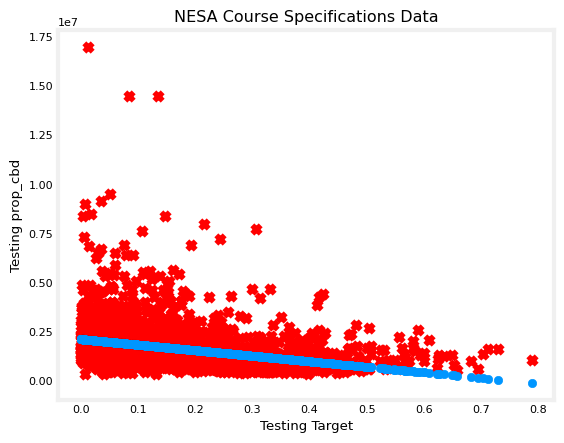

In [5]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.scatter(x_test, y_pred)
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

- As mentioned previously the linear regression model has high cost, representative of its lack of applicability here for predicting house prices

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [6]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.08363255175060591


- This is a very poor scores and further illustrates how there is no linear relationship between a single input feature and the target 

#### Step 7 

- Manually Calculate and evaluate the 'loss' and 'cost' of the model using the testing data

In [7]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

        Target  date_sold  Predicted result        Loss
0     0.128893    1600000      1.761856e+06  -161855.88
1     0.062907     775000      1.947520e+06 -1172520.01
2     0.004606    1800000      2.111561e+06  -311561.37
3     0.166629    1600000      1.655681e+06   -55680.74
4     0.148117    1390000      1.707766e+06  -317766.49
...        ...        ...               ...         ...
2329  0.277046    1050000      1.345001e+06  -295001.28
2330  0.015509    3050000      2.080884e+06   969115.82
2331  0.255869     845000      1.404588e+06  -559587.78
2332  0.094004    1210000      1.860024e+06  -650023.78
2333  0.063015     745000      1.947215e+06 -1202215.09

[2334 rows x 4 columns]
The cost or average loss of this model is 34352.84711653814


- As you can see there is an extremely high cost when just using one input feature

#### Step 9. Multiple Variable Linear Regression

Loading the multi-variable linear regression model for testing

In [21]:
filename = 'LinearRegression_Models/A/A_MV_model_v7.sav'
model_C = pickle.load(open(filename, 'rb'))

Opening and parsing the test data CSV file, with the specific input features collected

In [22]:
mx_col = ['ds_float','num_parking', 'num_bed', 'num_bath', 'property_size', 'suburb_lat', 'suburb_lng', 'prop_cbd', 'tot_rooms', 'suburb_median_income', 'km_from_cbd']
testing_data = pd.read_csv('A_testing_data_new_1.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

#### Step 10

- Individually plotting test data features, targets and predictions from the model, on a graph for each input feature, with the purpose of visually evaluating the accuracy of the model

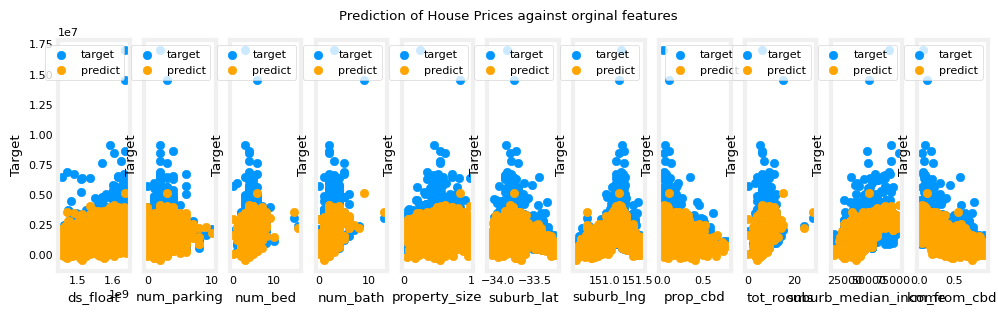

In [23]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Prediction of House Prices against orginal features")
plt.show()

In [24]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5507150474478955


- Thus including almost all features contributes to a far higher test score when using multivariable linear regression.

The other model types such as linear regression and polynomial regression did not produce similar scores to that of MVLR

#### Step 11

- You can do predictions to get a feel for the model

In [25]:
print(model_C.predict([[0.1,0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]))

[-2.66349947e+08]


#### Step 12 

- Manually calculating the loss and cost of the model using testing data

In [26]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

          ds_float  num_parking  num_bed  num_bath  property_size  suburb_lat  \
0     1.629331e+09          1.0      2.0       1.0       0.615447   -33.49914   
1     1.485734e+09          2.0      4.0       3.0       0.553659   -34.03534   
2     1.461802e+09          2.0      4.0       2.0       0.538211   -33.86291   
3     1.639786e+09          2.0      3.0       1.0       0.460976   -33.80918   
4     1.476144e+09          2.0      3.0       1.0       0.414634   -33.21474   
...            ...          ...      ...       ...            ...         ...   
2329  1.538438e+09          2.0      4.0       2.0       0.383740   -33.86491   
2330  1.515974e+09          1.0      3.0       2.0       0.239837   -33.38486   
2331  1.460592e+09          2.0      4.0       3.0       0.506504   -33.32678   
2332  1.631664e+09          1.0      3.0       1.0       0.872358   -34.00510   
2333  1.637280e+09          2.0      3.0       2.0       0.113821   -33.95213   

      suburb_lng  prop_cbd 

Shows the x axis intercepts, which are the values when inputs are 0 and the coefficients which is the influence a feature has on the prediction

In [28]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -266373655.99675843
Coefficient: [ 3.79397333e-03  4.69936024e+03 -7.00862970e+04  1.53791081e+05
  2.23425162e+06 -5.14300103e+05  1.60304966e+06 -3.25805950e+06
  8.37047839e+04  3.48381362e+01]


- The differences in coefficients illuminate how the different input features  influence the model, features like prop_cbd have a high coefficient meaning they have a large influence on the model prediction